In [ ]:
import pandas as pd
from google.colab import drive
import os
drive.mount('/content/drive')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
from imblearn.over_sampling import SMOTE
import matplotlib as mpl
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

MessageError: ignored

##PRESENTACION DEL DATASET##

##Introduccion

El índice publicado en Economic Freedom of the World por el Instituto Fraser mide el grado en que las políticas e instituciones de los países apoyan la libertad económica. Las piedras angulares de la libertad económica son la elección personal, el intercambio voluntario, la libertad de entrar en los mercados y competir, y la seguridad de la persona y la propiedad privada. Se utilizan cuarenta y dos puntos de datos para construir un índice resumen y para medir el grado de libertad económica en cinco áreas amplias.

Área 1: Tamaño del gobierno - A medida que el gasto público, los impuestos y el tamaño de las empresas controladas por el gobierno aumenta, el gobierno la toma de decisiones se sustituye por la elección individual y económica se reduce la libertad.

Área 2: Régimen Jurídico y Derechos de Propiedad - Protección de las personas y su propiedad legítimamente adquirida es un elemento central de ambos libertad económica y sociedad civil. De hecho, es el más importante función de gobierno.

Área 3: Dinero sólido - La inflación erosiona el valor de lo ganado legítimamente salarios y ahorros. El dinero sólido es, por lo tanto, esencial para proteger la propiedad. derechos. Cuando la inflación no solo es alta sino también volátil, se vuelve difícil para las personas planificar para el futuro y, por lo tanto, utilizar la libertad económica de manera efectiva.

Área 4: Libertad de Comercio Internacional - Libertad de intercambio en su sentido más amplio, comprar, vender, hacer contratos, etc., es esencial para la libertad económica, que se reduce cuando la libertad de intercambio no incluye empresas e individuos en otros naciones

Área 5: Regulación - Los gobiernos no solo utilizan una serie de herramientas para limitan el derecho a intercambiar internacionalmente, también pueden desarrollar regulaciones onerosas que limitan el derecho a cambiar, ganar crédito, contratar o trabajar para quien desee, u operar libremente su negocio.

##Definicion de objetivo
Detectar el bienestar de los paises en base a quien tienen más libertad económica y cuales menos, cuales presentan mayor o menor inflación, etc. En base a eso, detectar la calidad de vida de las personas en los diferentes países. ¿Hay correlación o algun tipo de causalidad en la libertad economica de un país con respecto al tamaño de su estado o su eficiencia, de sus gastos, inflación o la libertad de comerciar con el resto del mundo?.

##Contexto comercial
La empresa al realizar dicho analisis puede obtener un redito economico al vender dicha información a institutos de investigación u otras empresas que quieran saber cuales son los mejores países para comercializar de manera mas libre. El redito económico al que apunta la empresa es una suscripcion mensual o anual dependiendo del tipo de analisis de datos que se realice, como si fuera un newsletter.

##Problema comercial
Se han detectado diferentes corrientes o doctrinas económicas para intentar explicar el crecimiento o progreso economico de un país o su declive económico.

Es función del equipo de investigación determinar qué variables tienen relación con la prosperiodad o decadencia economica de un país. Se busca excluir esas variables que luego de analizarlas, no tengan una relación con los hechos analizados para dedicarle mas tiempo a los que si.

##Informacion del dataset##



El dataset obtenido contiene las siguientes columnas:

year    =                                año

ISO_code    =                           codigo de pais

countries    =                          pais

ECONOMIC FREEDOM   =                   libertad economica

rank      =                            rankin

quartile   =                           rango quartil

1a_government_consumption  =           consumo de gobierno

1b_transfers        =                  transferencias

1c_gov_enterprises   =                 empresas de gobierno

1d_top_marg_tax_rate  =                tasa impositiva de margen superior

1_size_government    =                 tamaño de gobierno

2a_judicial_independence   =           independencia judicial

2b_impartial_courts     =              tribunales imparciales

2c_protection_property_rights  =       proteccion de derechos de propiedad

2d_military_interference     =         interferencia militar

2e_integrity_legal_system    =         integridad de sistema legal

2f_legal_enforcement_contracts =       contratos de ejecucion legal

2g_restrictions_sale_real_property  =  restricciones venta bienes inmuebles

2h_reliability_police    =             policía de confiabilidad

2i_business_costs_crime   =            costos del negocio del crimen

2j_gender_adjustment      =            ajuste de género

2_property_rights       =              derechos de propiedad

3a_money_growth        =               crecimiento de dinero

3b_std_inflation        =              inflacion estandar

3c_inflation            =              inflacion

3d_freedom_own_foreign_currency =      libertad moneda extranjera propia

3_sound_money          =               dinero sonoro

4a_tariffs            =                aranceles

4b_regulatory_trade_barriers   =       barrera comercial regulatoria

4c_black_market              =         mercado negro

4d_control_movement_capital_ppl=       controlar movimiento capital

4_trade                   =            comercio

5a_credit_market_reg       =          registro del mercado de crédito

5b_labor_market_reg      =             registro del mercado laboral

5c_business_reg          =             negocios registrados

5_regulation             =             regulacion

In [ ]:
df_efw= pd.read_csv('/content/drive/MyDrive/coder data/efw_cc 2.csv',sep=',')
df_efw

,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,8.0,...,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,2016,DZA,Algeria,4.99,159.0,4.0,2.150000,7.817129,0.0,4.5,...,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,2016,AGO,Angola,5.17,155.0,4.0,7.600000,8.886739,0.0,9.5,...,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,2016,ARG,Argentina,4.84,160.0,4.0,5.335294,6.048930,6.0,4.0,...,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,2016,ARM,Armenia,7.57,29.0,1.0,7.264706,7.748532,8.0,5.0,...,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,1970,VEN,Venezuela,7.18,10.0,1.0,6.602003,9.827430,7.0,NaN,...,9.713677,8.066667,NaN,10.00000,8.000000,8.688889,9.679680,NaN,NaN,5.312277
3722,1970,VNM,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3723,1970,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3724,1970,ZMB,Zambia,NaN,NaN,NaN,3.448131,9.105430,0.0,NaN,...,5.133689,NaN,NaN,0.00000,2.000000,NaN,7.327327,NaN,NaN,NaN


## **Vemos datos importantes del dataset** ##

In [ ]:
df_efw.describe()

,year,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,1_size_government,2a_judicial_independence,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
count,3726.000000,3003.000000,3003.000000,3003.000000,3137.000000,2766.000000,3080.000000,2679.000000,3079.000000,2173.000000,...,3115.000000,3045.000000,2378.000000,3109.000000,3134.000000,3035.000000,3107.000000,2568.000000,2324.000000,2998.000000
mean,2001.347826,6.519640,68.307026,2.497835,5.862426,7.672901,5.737987,5.813177,6.232061,5.019474,...,7.660619,7.078796,6.332996,9.115282,4.376398,6.719849,7.732523,6.168449,6.188570,6.638470
std,12.735125,1.133638,41.343417,1.118963,2.270241,2.138957,3.242377,2.654083,1.447985,2.249670,...,1.812816,1.821355,1.712494,2.460966,2.694049,1.720183,2.123763,1.509150,1.268471,1.240397
min,1970.000000,1.970000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.653797,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.837167,2.009841,1.002000
25%,1995.000000,5.855000,33.000000,1.000000,4.450000,6.207809,4.000000,4.000000,5.229374,3.259067,...,6.604056,6.208800,5.462975,10.000000,2.000000,5.946710,6.800388,5.072882,5.386941,5.877893
50%,2005.000000,6.680000,66.000000,3.000000,6.082353,8.432251,7.000000,6.000000,6.319653,4.698028,...,7.968903,7.480000,6.592045,10.000000,4.768803,7.011524,8.305564,6.197257,6.169513,6.759404
75%,2011.000000,7.350000,102.000000,3.000000,7.571360,9.482289,8.000000,8.000000,7.267682,6.822563,...,9.257395,8.333483,7.515852,10.000000,6.493357,7.916308,9.333333,7.344125,7.007430,7.486336
max,2016.000000,9.190000,162.000000,4.000000,10.000000,10.000000,10.000000,10.000000,9.904651,9.816667,...,9.922187,10.000000,9.833333,10.000000,10.000000,10.000000,10.000000,9.725000,9.503739,9.439828


##Data Wrangling##


Como queremos predecir 'ECONOMIC FREEDOM', eliminamos valores faltantes y columnas que creemos que no afectarían al modelo. Las columnas '2h_reliability_police', '2i_business_costs_crime' y 'ECONOMIC FREEDOM' las eliminamos por tener muchos valores faltantes. A 'ECONOMIC FREEDOM' la eliminamos porque es la variable a predecir.

In [ ]:
df_efw.isna().sum()

year                                     0
ISO_code                                 0
countries                                0
ECONOMIC FREEDOM                       723
rank                                   723
quartile                               723
1a_government_consumption              589
1b_transfers                           960
1c_gov_enterprises                     646
1d_top_marg_tax_rate                  1047
1_size_government                      647
2a_judicial_independence              1553
2b_impartial_courts                   1179
2c_protection_property_rights         1129
2d_military_interference              1186
2e_integrity_legal_system             1153
2f_legal_enforcement_contracts        1361
2g_restrictions_sale_real_property    1384
2h_reliability_police                 2071
2i_business_costs_crime               2071
2j_gender_adjustment                    66
2_property_rights                      755
3a_money_growth                        644
3b_std_infl

In [ ]:
df_efw = df_efw.dropna(subset=['1a_government_consumption',
                               '1_size_government',
                               '3b_std_inflation',
                               '3a_money_growth',
                               '3c_inflation',
                               '3d_freedom_own_foreign_currency',
                               '3_sound_money',
                               '4c_black_market',
                               '5a_credit_market_reg',
                               '5_regulation',
                               '4_trade',
                               '2_property_rights',
                               '4a_tariffs',
                               '1c_gov_enterprises',
                               '1b_transfers'])

In [ ]:
df_efw = df_efw.drop(['2h_reliability_police', '2i_business_costs_crime','ISO_code'], axis=1)

<Axes: >

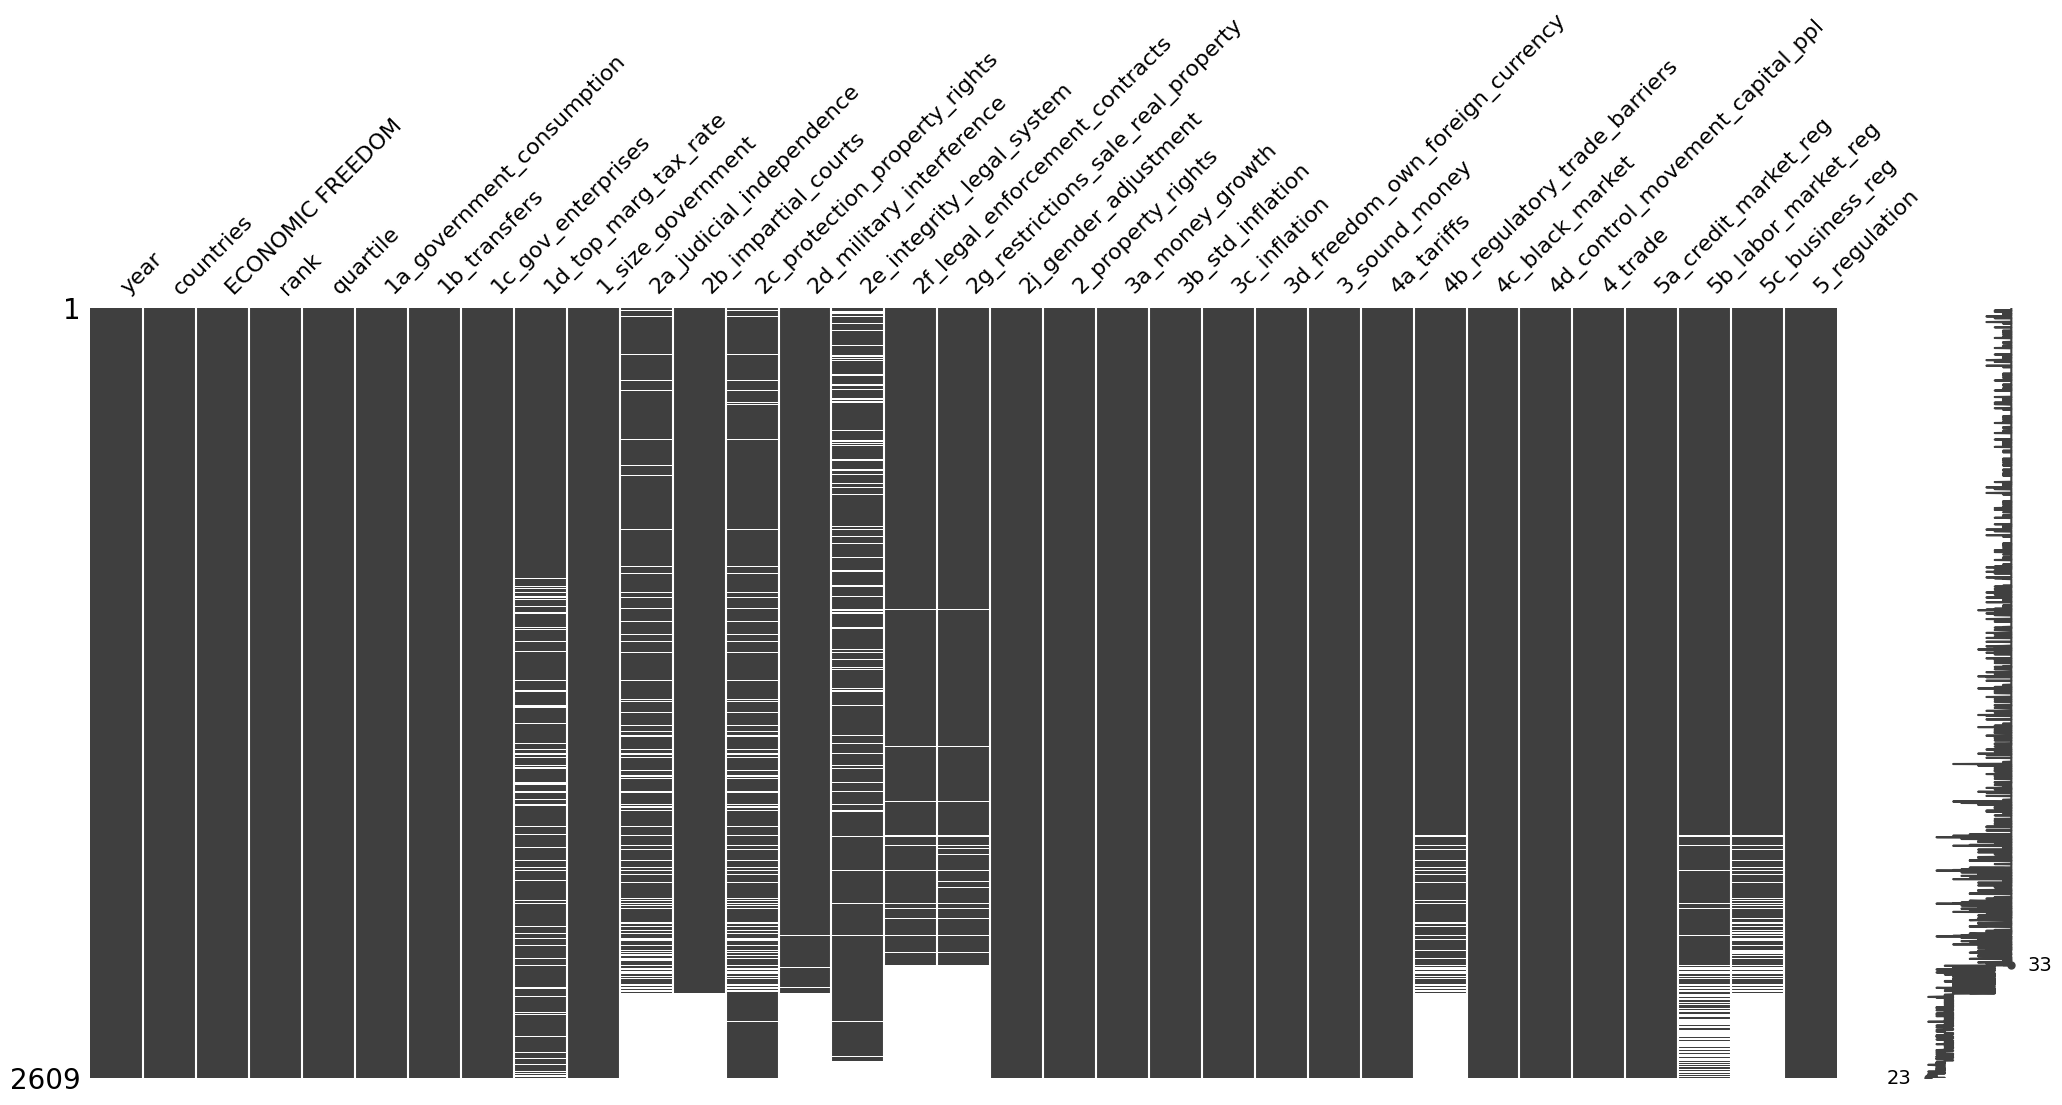

In [ ]:
msno.matrix(df_efw)

In [ ]:
df_efw.isna().sum()

year                                    0
countries                               0
ECONOMIC FREEDOM                        0
rank                                    0
quartile                                0
1a_government_consumption               0
1b_transfers                            0
1c_gov_enterprises                      0
1d_top_marg_tax_rate                  192
1_size_government                       0
2a_judicial_independence              577
2b_impartial_courts                   287
2c_protection_property_rights         278
2d_military_interference              294
2e_integrity_legal_system             295
2f_legal_enforcement_contracts        440
2g_restrictions_sale_real_property    449
2j_gender_adjustment                    0
2_property_rights                       0
3a_money_growth                         0
3b_std_inflation                        0
3c_inflation                            0
3d_freedom_own_foreign_currency         0
3_sound_money                     

De acuerdo al gráfico, en algunas columnas hay faltantes de datos pero, al ser pocos, lo solucionaremos agregando valores de la media de la columna.

In [ ]:
df_efw['top_marg_tax_rate'] = df_efw['1d_top_marg_tax_rate'].fillna(df_efw['1d_top_marg_tax_rate'].mean())
df_efw = df_efw.drop(['1d_top_marg_tax_rate'], axis=1)

df_efw['business_reg'] = df_efw['5c_business_reg'].fillna(df_efw['5c_business_reg'].mean())
df_efw = df_efw.drop(['5c_business_reg'], axis=1)

df_efw['labor_market_reg'] = df_efw['5b_labor_market_reg'].fillna(df_efw['5b_labor_market_reg'].mean())
df_efw = df_efw.drop(['5b_labor_market_reg'], axis=1)

df_efw['regulatory_trade_barriers'] = df_efw['4b_regulatory_trade_barriers'].fillna(df_efw['4b_regulatory_trade_barriers'].mean())
df_efw = df_efw.drop(['4b_regulatory_trade_barriers'], axis=1)

df_efw['judicial_independence'] = df_efw['2a_judicial_independence'].fillna(df_efw['2a_judicial_independence'].mean())
df_efw = df_efw.drop(['2a_judicial_independence'], axis=1)

df_efw['impartial_courts'] = df_efw['2b_impartial_courts'].fillna(df_efw['2b_impartial_courts'].mean())
df_efw = df_efw.drop(['2b_impartial_courts'], axis=1)

df_efw['protection_property_rights'] = df_efw['2c_protection_property_rights'].fillna(df_efw['2c_protection_property_rights'].mean())
df_efw = df_efw.drop(['2c_protection_property_rights'], axis=1)

df_efw['military_interference'] = df_efw['2d_military_interference'].fillna(df_efw['2d_military_interference'].mean())
df_efw = df_efw.drop(['2d_military_interference'], axis=1)

df_efw['integrity_legal_system'] = df_efw['2e_integrity_legal_system'].fillna(df_efw['2e_integrity_legal_system'].mean())
df_efw = df_efw.drop(['2e_integrity_legal_system'], axis=1)

df_efw['legal_enforcement_contracts'] = df_efw['2f_legal_enforcement_contracts'].fillna(df_efw['2f_legal_enforcement_contracts'].mean())
df_efw = df_efw.drop(['2f_legal_enforcement_contracts'], axis=1)

df_efw['restrictions_sale_real_property'] = df_efw['2g_restrictions_sale_real_property'].fillna(df_efw['2g_restrictions_sale_real_property'].mean())
df_efw = df_efw.drop(['2g_restrictions_sale_real_property'], axis=1)

df_efw.isna().sum()

year                               0
countries                          0
ECONOMIC FREEDOM                   0
rank                               0
quartile                           0
1a_government_consumption          0
1b_transfers                       0
1c_gov_enterprises                 0
1_size_government                  0
2j_gender_adjustment               0
2_property_rights                  0
3a_money_growth                    0
3b_std_inflation                   0
3c_inflation                       0
3d_freedom_own_foreign_currency    0
3_sound_money                      0
4a_tariffs                         0
4c_black_market                    0
4d_control_movement_capital_ppl    0
4_trade                            0
5a_credit_market_reg               0
5_regulation                       0
top_marg_tax_rate                  0
business_reg                       0
labor_market_reg                   0
regulatory_trade_barriers          0
judicial_independence              0
i

In [ ]:
df_efw

,year,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1_size_government,2j_gender_adjustment,...,business_reg,labor_market_reg,regulatory_trade_barriers,judicial_independence,impartial_courts,protection_property_rights,military_interference,integrity_legal_system,legal_enforcement_contracts,restrictions_sale_real_property
0,2016,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,7.935564,0.948718,...,6.705863,6.916278,7.489905,2.668222,3.145462,4.512228,8.333333,4.166667,4.387444,6.485287
1,2016,Algeria,4.99,159.0,4.0,2.150000,7.817129,0.0,3.616782,0.820513,...,5.676956,5.029513,2.481294,4.186704,4.327113,4.689952,4.166667,5.000000,4.507538,6.626692
2,2016,Angola,5.17,155.0,4.0,7.600000,8.886739,0.0,6.496685,0.846154,...,4.930271,4.560325,2.024949,1.843129,1.974566,2.512364,3.333333,4.166667,2.302200,5.455882
3,2016,Argentina,4.84,160.0,4.0,5.335294,6.048930,6.0,5.346056,0.769231,...,5.535831,5.151405,4.811105,3.689690,2.930563,4.255995,7.500000,3.333333,3.632872,6.857195
4,2016,Armenia,7.57,29.0,1.0,7.264706,7.748532,8.0,7.003310,1.000000,...,6.797530,6.234630,7.194410,3.867379,4.197569,5.664317,5.833333,5.000000,5.196693,9.801963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,1970,Taiwan,6.40,22.0,2.0,4.561765,10.000000,2.0,5.520588,0.962963,...,6.232339,6.213647,6.402051,5.067532,4.737286,9.100000,6.662722,6.314790,4.488186,7.099947
3709,1970,Thailand,6.20,25.0,2.0,7.668155,10.000000,6.0,7.889385,1.000000,...,6.232339,6.213647,6.402051,5.067532,4.737286,6.500000,6.662722,6.314790,4.488186,7.099947
3713,1970,Tunisia,4.44,47.0,4.0,5.687737,8.988691,0.0,4.892143,0.666667,...,6.232339,6.213647,6.402051,5.067532,4.737286,3.600000,6.662722,6.314790,4.488186,7.099947
3719,1970,United States,7.77,4.0,1.0,5.108942,7.980926,8.0,5.272467,1.000000,...,6.232339,4.347600,6.402051,5.067532,4.737286,10.000000,6.662722,6.314790,4.488186,7.099947


In [ ]:
df_efw['year'] = df_efw['year'].astype('float64')
df_efw2 = df_efw.drop(['countries'], axis=1)

In [ ]:
df_efw2.dtypes

year                               float64
ECONOMIC FREEDOM                   float64
rank                               float64
quartile                           float64
1a_government_consumption          float64
1b_transfers                       float64
1c_gov_enterprises                 float64
1_size_government                  float64
2j_gender_adjustment               float64
2_property_rights                  float64
3a_money_growth                    float64
3b_std_inflation                   float64
3c_inflation                       float64
3d_freedom_own_foreign_currency    float64
3_sound_money                      float64
4a_tariffs                         float64
4c_black_market                    float64
4d_control_movement_capital_ppl    float64
4_trade                            float64
5a_credit_market_reg               float64
5_regulation                       float64
top_marg_tax_rate                  float64
business_reg                       float64
labor_marke

##Exploratory Data Analysis##

In [ ]:
df_efw2.describe()

,year,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1_size_government,2j_gender_adjustment,2_property_rights,...,business_reg,labor_market_reg,regulatory_trade_barriers,judicial_independence,impartial_courts,protection_property_rights,military_interference,integrity_legal_system,legal_enforcement_contracts,restrictions_sale_real_property
count,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,...,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000
mean,2005.194711,6.676688,65.926409,2.393254,5.811919,7.649024,6.168647,6.369574,0.894655,5.393461,...,6.232339,6.213647,6.402051,5.067532,4.737286,5.585919,6.662722,6.314790,4.488186,7.099947
std,9.535072,1.042259,41.138466,1.106056,2.145258,2.138723,3.103765,1.359145,0.151544,1.760172,...,1.140200,1.414904,1.560702,2.009534,1.691253,1.862274,2.580880,2.212028,1.555101,1.798182
min,1970.000000,1.970000,1.000000,1.000000,0.000000,0.844687,0.000000,1.626916,0.000000,0.993958,...,2.009841,2.099009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.398043
25%,2002.000000,6.050000,30.000000,1.000000,4.441176,6.158038,4.000000,5.402328,0.837838,4.142900,...,5.641612,5.280736,5.758668,3.666667,3.507000,4.366916,5.000000,5.000000,3.553882,6.423861
50%,2007.000000,6.840000,62.000000,2.000000,5.941176,8.418998,7.000000,6.438235,0.962963,5.342738,...,6.232339,6.213647,6.402051,5.067532,4.721858,5.585919,6.666667,6.314790,4.488186,7.099947
75%,2012.000000,7.410000,99.000000,3.000000,7.420588,9.462711,8.000000,7.363513,1.000000,6.491488,...,6.825495,7.242353,7.392468,6.333333,5.692308,6.851852,8.333333,8.333333,5.396887,8.379527
max,2016.000000,9.190000,162.000000,4.000000,10.000000,10.000000,10.000000,9.904651,1.000000,9.278333,...,9.503739,9.725000,9.833333,9.816667,9.686000,10.000000,10.000000,10.000000,8.478714,9.981101


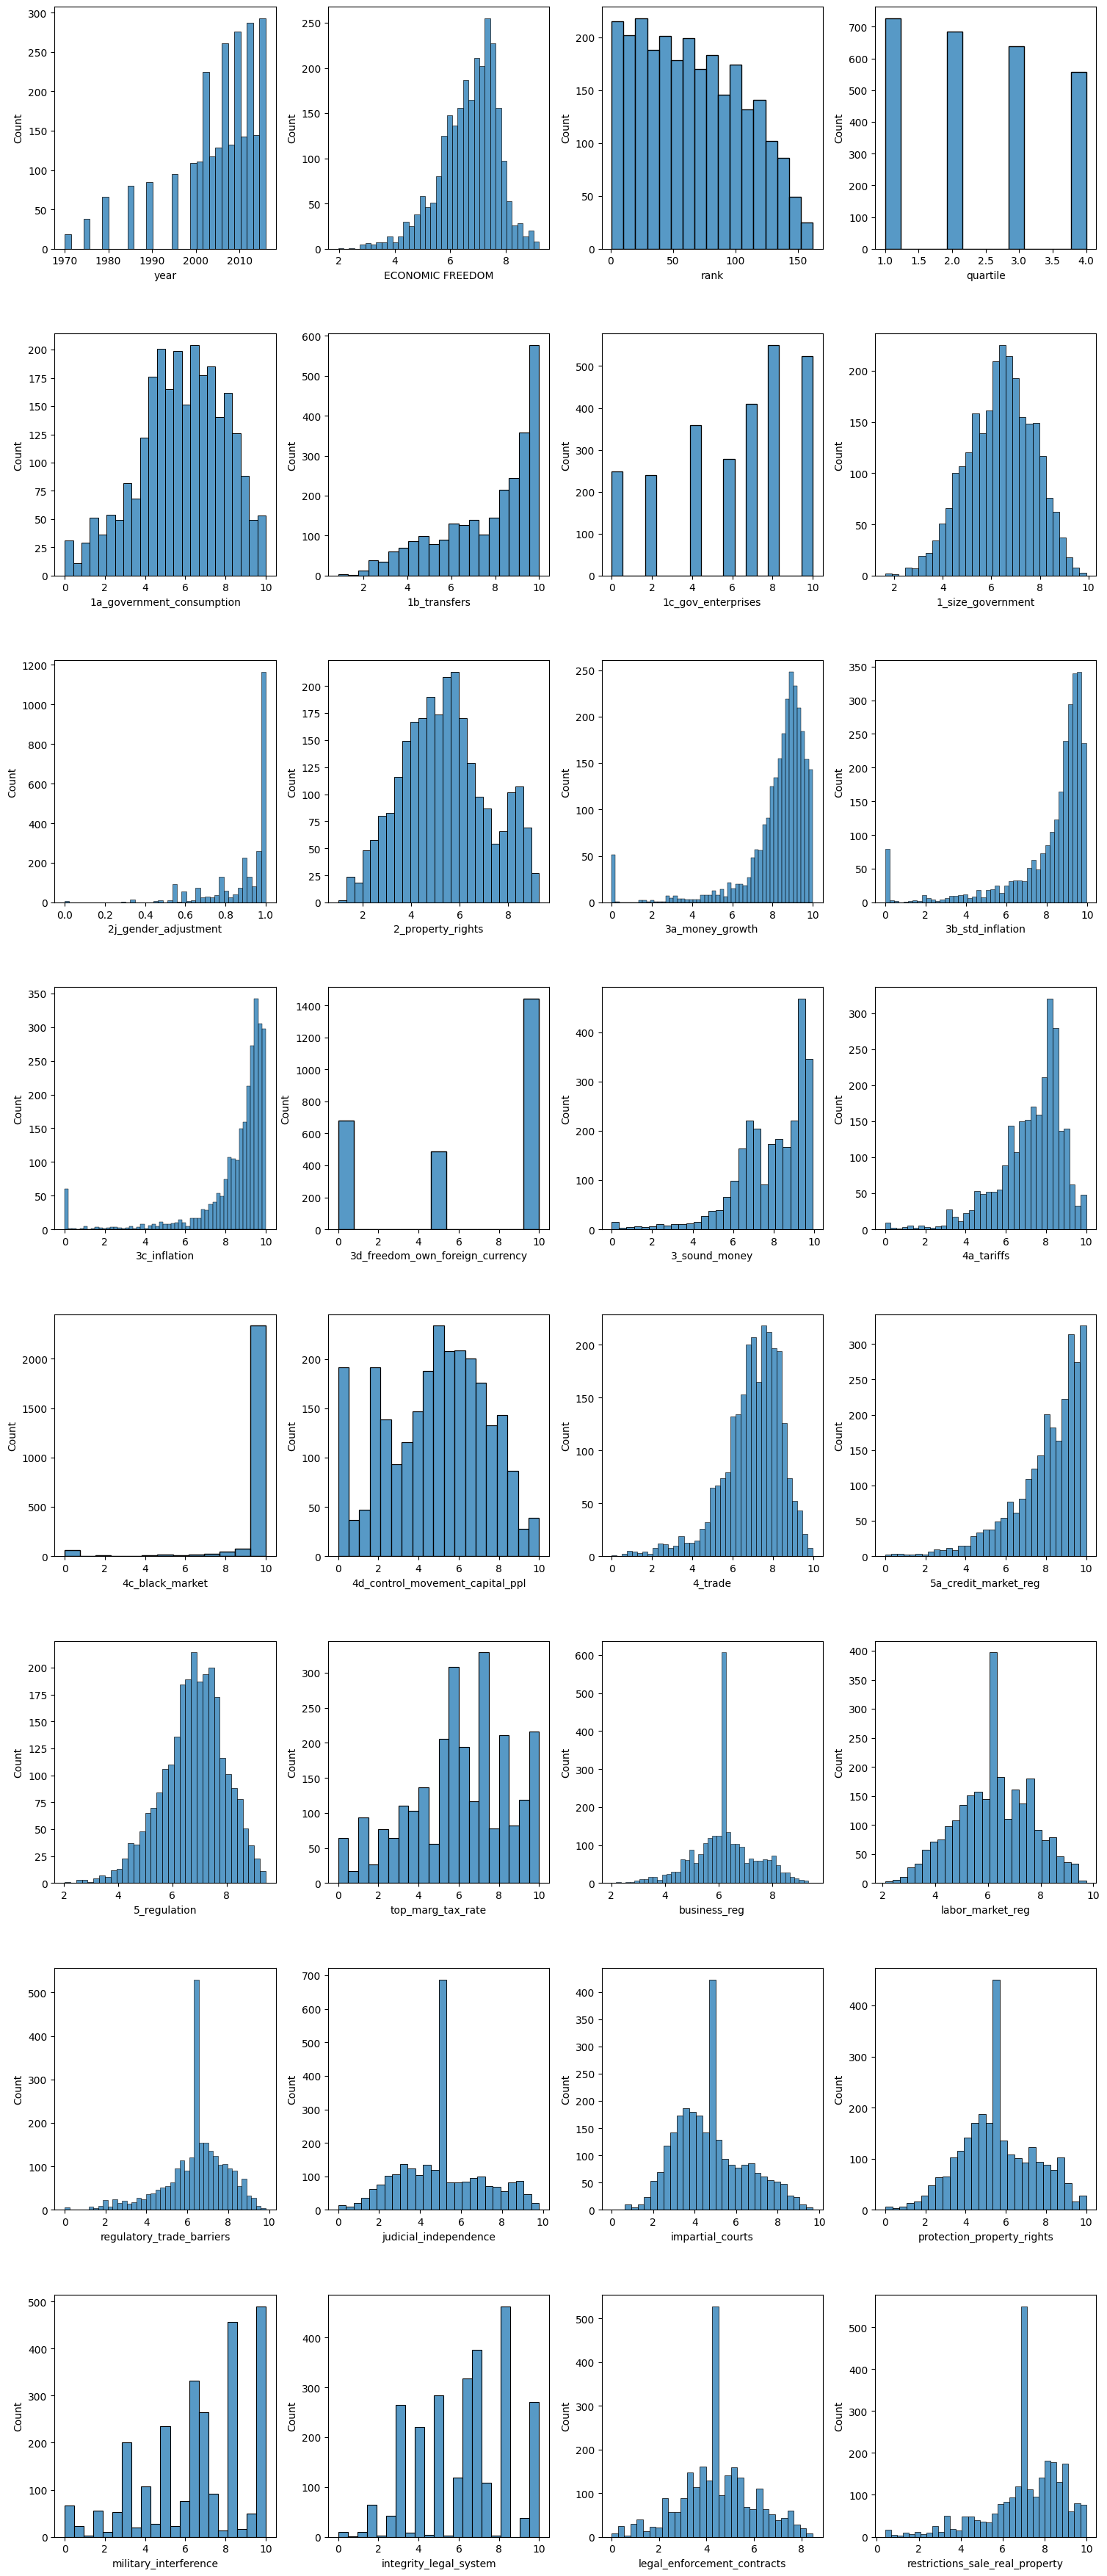

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=8, figsize=(15,35))
index = 0
axs = axs.flatten()
for k,v in df_efw2.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Text(0, 0.5, 'Inflación')

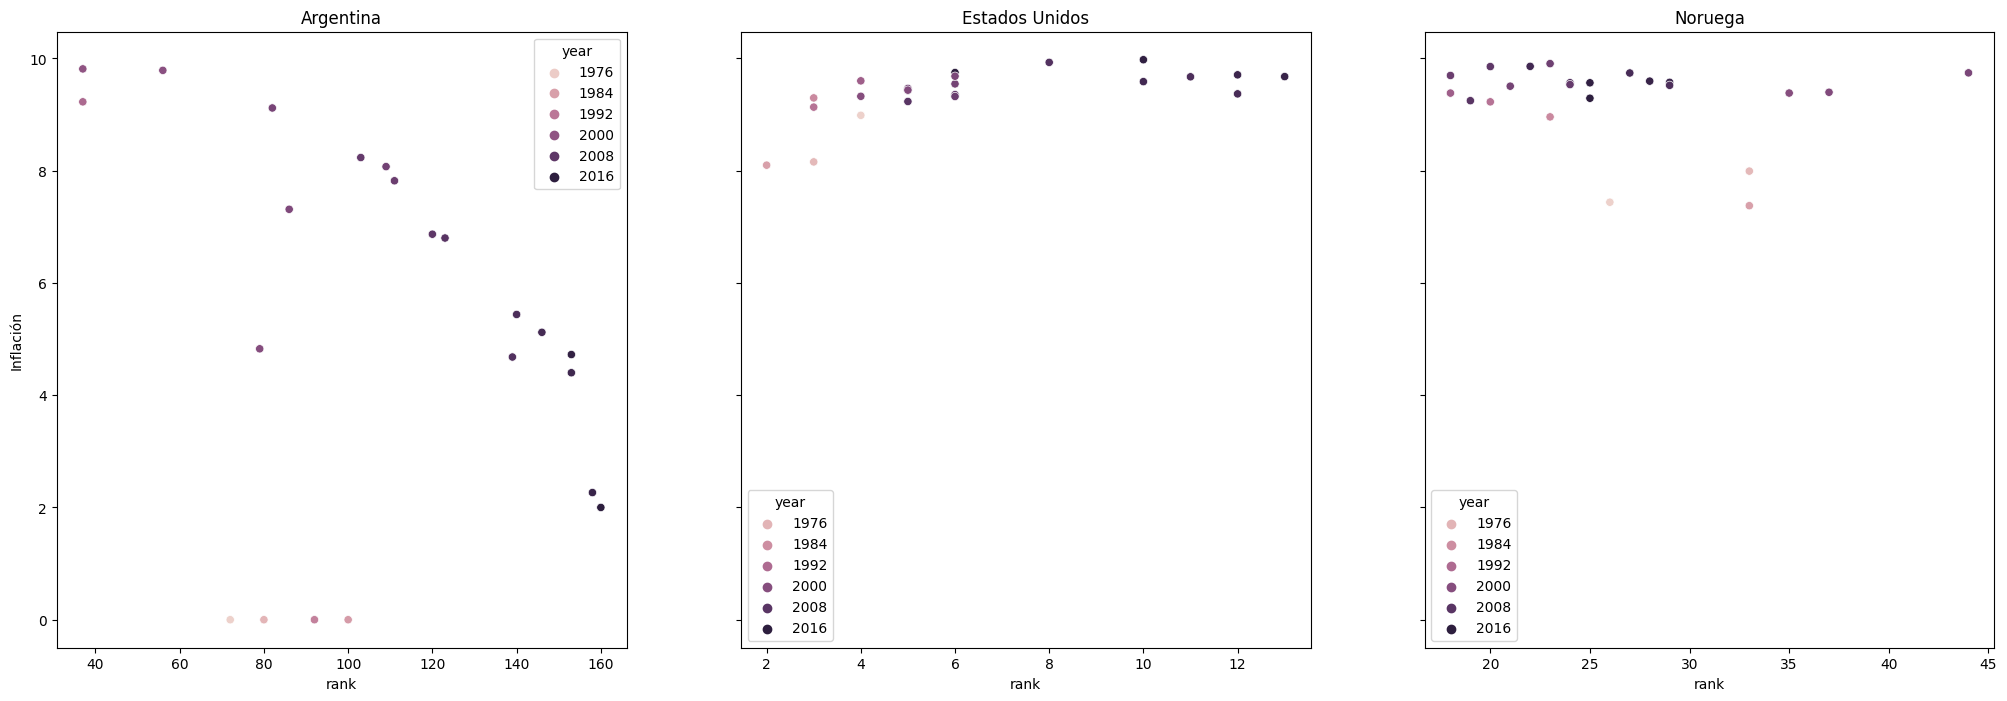

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8),
                       sharey=True)

sns.scatterplot(data=df_efw.loc[df_efw.countries=='Argentina'],
            x='rank',
            y='3c_inflation',
            hue='year',
            ax=ax[0],
             )

sns.scatterplot(data=df_efw.loc[df_efw.countries=='United States'],
            x='rank',
            y='3c_inflation',
            hue='year',
            ax=ax[1],
             )

sns.scatterplot(data=df_efw.loc[df_efw.countries=='Norway'],
            x='rank',
            y='3c_inflation',
            hue='year',
            ax=ax[2],
             )

ax[0].set_title('Argentina')
ax[1].set_title('Estados Unidos')
ax[2].set_title('Noruega')

ax[0].set_ylabel('Inflación') #filas

En esta línea de codigo se dispone a mostrar una comparativa entre 3 países, respecto a como varia su ranking dependiendo su inflación. Podemos visualizar como Argentina empeora aun que su inflación disminuya segun los datos presentados, como estados unidos mantiene su inflación pero no su ranking y como Noruega mejora en el ranking sin variar su inflación.

In [ ]:
df2=df_efw.loc[df_efw.countries=='Argentina']
rank=df2[['year','rank']].groupby(by='year').sum()
tamaño_gob=df2[['1_size_government','year']].groupby(by='year').sum()

Text(0, 0.5, 'Tamaño de estado')

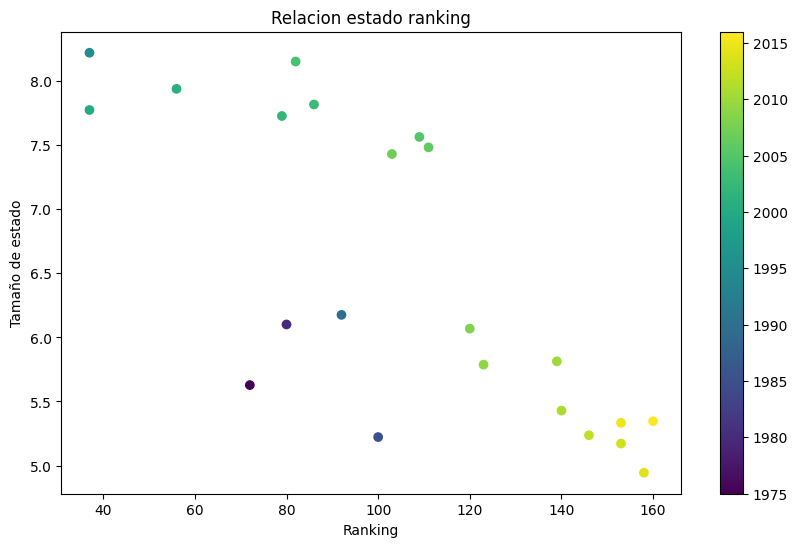

In [ ]:
fig, ax = plt.subplots(figsize =(10, 6))
mapeo_colores = ax.scatter(rank, tamaño_gob,
                          c=rank.index)#asigno colores a los valores del indice (años) con parametro c
fig.colorbar(mapeo_colores) #agrego una barra a la derecha con los colores de los años y las etiquetas respectivas

ax.set_title('Relacion estado ranking')
ax.set_xlabel('Ranking')
ax.set_ylabel('Tamaño de estado')

Acá podemos visualizar una clara baja en el ranking a medida que el tamaño del estado Argentino crece. Para realizar este gráfico tuve inconvenientes y tuve que definir la variable previamente ya que no me permitia realizarlo de otra manera

<Axes: >

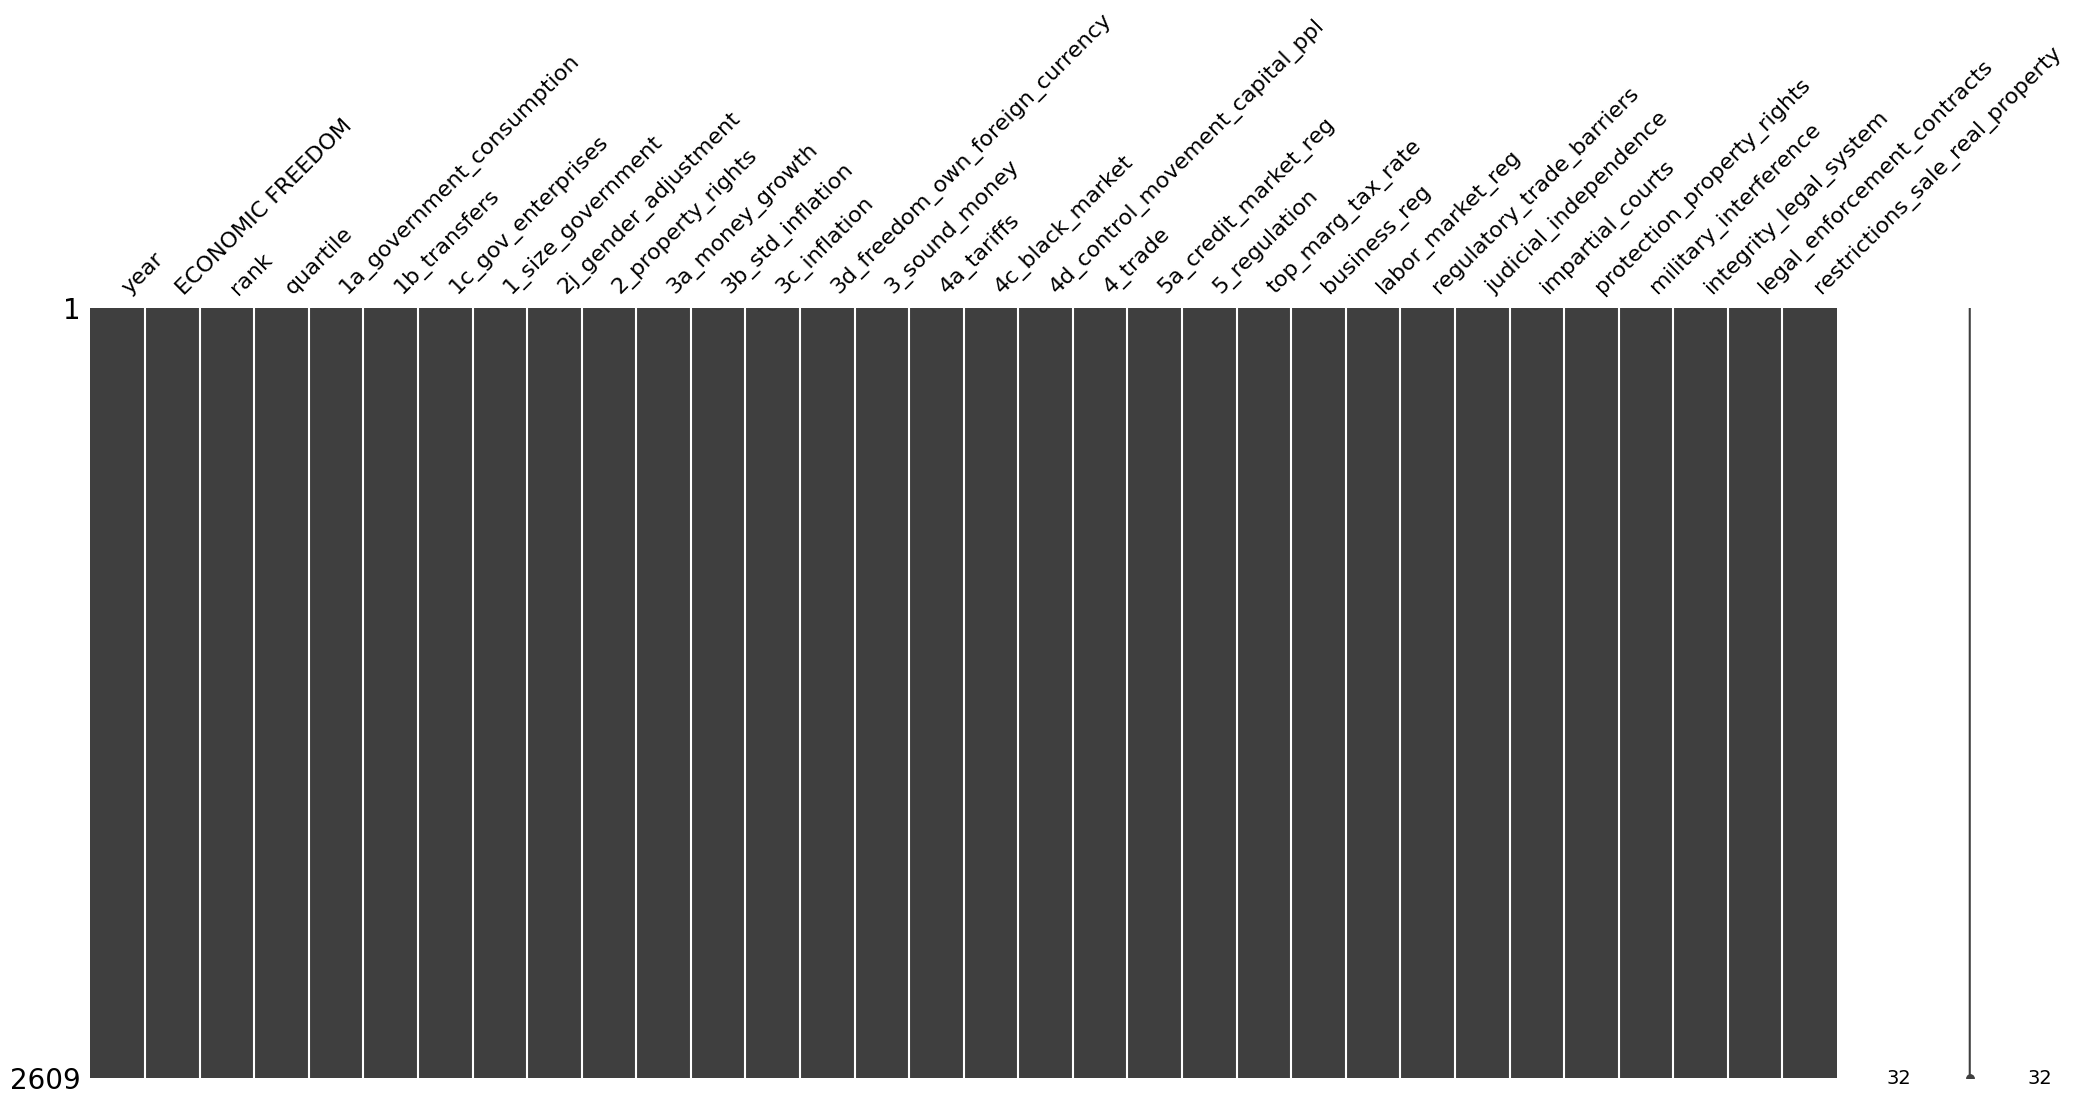

In [ ]:
msno.matrix(df_efw2)

In [ ]:
fig = px.treemap(df_efw, path=[px.Constant('world'), 'countries'],
                 values='ECONOMIC FREEDOM',
                  color='1a_government_consumption')
fig.show()

De acuerdo al gráfico obtenido, se puede observar que a medida que el consumo gubernamental es mayor el color es mas amarillo.

##Creacion del modelo##

In [ ]:
df_efw.columns

Index(['year', 'countries', 'ECONOMIC FREEDOM', 'rank', 'quartile',
       '1a_government_consumption', '1b_transfers', '1c_gov_enterprises',
       '1_size_government', '2j_gender_adjustment', '2_property_rights',
       '3a_money_growth', '3b_std_inflation', '3c_inflation',
       '3d_freedom_own_foreign_currency', '3_sound_money', '4a_tariffs',
       '4c_black_market', '4d_control_movement_capital_ppl', '4_trade',
       '5a_credit_market_reg', '5_regulation', 'top_marg_tax_rate',
       'business_reg', 'labor_market_reg', 'regulatory_trade_barriers',
       'judicial_independence', 'impartial_courts',
       'protection_property_rights', 'military_interference',
       'integrity_legal_system', 'legal_enforcement_contracts',
       'restrictions_sale_real_property'],
      dtype='object')

In [ ]:
x = df_efw[['year', '1a_government_consumption',
       '1b_transfers', '1c_gov_enterprises', '1_size_government',
       '2j_gender_adjustment', '2_property_rights', '3a_money_growth',
       '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency', '4a_tariffs', '4c_black_market'
       , '4_trade', 'top_marg_tax_rate', 'business_reg', 'labor_market_reg',
       'regulatory_trade_barriers', 'judicial_independence', 'protection_property_rights',
       'military_interference', 'integrity_legal_system',
       'legal_enforcement_contracts', 'restrictions_sale_real_property'
       ]]

y = df_efw['ECONOMIC FREEDOM']

x.head(10)

,year,1a_government_consumption,1b_transfers,1c_gov_enterprises,1_size_government,2j_gender_adjustment,2_property_rights,3a_money_growth,3b_std_inflation,3c_inflation,...,top_marg_tax_rate,business_reg,labor_market_reg,regulatory_trade_barriers,judicial_independence,protection_property_rights,military_interference,integrity_legal_system,legal_enforcement_contracts,restrictions_sale_real_property
0,2016.0,8.232353,7.509902,8.0,7.935564,0.948718,5.071814,8.986454,9.484575,9.74360,...,8.0,6.705863,6.916278,7.489905,2.668222,4.512228,8.333333,4.166667,4.387444,6.485287
1,2016.0,2.150000,7.817129,0.0,3.616782,0.820513,4.690743,6.955962,8.339152,8.72046,...,4.5,5.676956,5.029513,2.481294,4.186704,4.689952,4.166667,5.000000,4.507538,6.626692
2,2016.0,7.600000,8.886739,0.0,6.496685,0.846154,2.963635,9.385679,4.986742,3.05400,...,9.5,4.930271,4.560325,2.024949,1.843129,2.512364,3.333333,4.166667,2.302200,5.455882
3,2016.0,5.335294,6.048930,6.0,5.346056,0.769231,3.904030,5.233264,5.224079,2.00000,...,4.0,5.535831,5.151405,4.811105,3.689690,4.255995,7.500000,3.333333,3.632872,6.857195
4,2016.0,7.264706,7.748532,8.0,7.003310,1.000000,5.809215,9.078264,9.263496,9.74600,...,5.0,6.797530,6.234630,7.194410,3.867379,5.664317,5.833333,5.000000,5.196693,9.801963
5,2016.0,4.511765,6.664948,10.0,6.544178,1.000000,7.919019,8.564838,9.500704,9.74462,...,5.0,8.121631,7.698589,7.427103,8.766929,7.998304,10.000000,9.166667,6.025331,8.205655
6,2016.0,3.744118,3.101062,10.0,5.086295,1.000000,7.915987,8.033869,9.875451,9.82200,...,3.5,7.419870,5.565118,8.254011,7.650855,8.092565,10.000000,10.000000,6.220993,8.100494
7,2016.0,6.320588,7.881208,0.0,5.175449,0.717949,5.652732,9.240398,6.649350,9.16420,...,6.5,7.080078,6.076782,6.799052,5.676886,6.321836,5.000000,5.833333,7.252962,9.830312
8,2016.0,7.085294,9.040503,7.0,8.281449,0.945946,6.658107,8.654101,8.975514,9.93080,...,10.0,7.523034,8.361606,8.105925,5.067532,5.585919,10.000000,6.666667,4.699257,6.149350
9,2016.0,3.688235,9.581704,10.0,8.317485,0.536585,5.265602,9.961596,8.215418,9.44040,...,10.0,8.018774,6.619418,6.295595,6.822563,7.435713,5.000000,7.500000,4.785814,8.855315


In [ ]:
df_efw['ECONOMIC FREEDOM'].describe()


count    2609.000000
mean        6.676688
std         1.042259
min         1.970000
25%         6.050000
50%         6.840000
75%         7.410000
max         9.190000
Name: ECONOMIC FREEDOM, dtype: float64

In [ ]:
x=pd.get_dummies(x)
x

,year,1a_government_consumption,1b_transfers,1c_gov_enterprises,1_size_government,2j_gender_adjustment,2_property_rights,3a_money_growth,3b_std_inflation,3c_inflation,...,top_marg_tax_rate,business_reg,labor_market_reg,regulatory_trade_barriers,judicial_independence,protection_property_rights,military_interference,integrity_legal_system,legal_enforcement_contracts,restrictions_sale_real_property
0,2016.0,8.232353,7.509902,8.0,7.935564,0.948718,5.071814,8.986454,9.484575,9.74360,...,8.000000,6.705863,6.916278,7.489905,2.668222,4.512228,8.333333,4.166667,4.387444,6.485287
1,2016.0,2.150000,7.817129,0.0,3.616782,0.820513,4.690743,6.955962,8.339152,8.72046,...,4.500000,5.676956,5.029513,2.481294,4.186704,4.689952,4.166667,5.000000,4.507538,6.626692
2,2016.0,7.600000,8.886739,0.0,6.496685,0.846154,2.963635,9.385679,4.986742,3.05400,...,9.500000,4.930271,4.560325,2.024949,1.843129,2.512364,3.333333,4.166667,2.302200,5.455882
3,2016.0,5.335294,6.048930,6.0,5.346056,0.769231,3.904030,5.233264,5.224079,2.00000,...,4.000000,5.535831,5.151405,4.811105,3.689690,4.255995,7.500000,3.333333,3.632872,6.857195
4,2016.0,7.264706,7.748532,8.0,7.003310,1.000000,5.809215,9.078264,9.263496,9.74600,...,5.000000,6.797530,6.234630,7.194410,3.867379,5.664317,5.833333,5.000000,5.196693,9.801963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,1970.0,4.561765,10.000000,2.0,5.520588,0.962963,7.577460,9.388788,9.208000,9.32000,...,5.807199,6.232339,6.213647,6.402051,5.067532,9.100000,6.662722,6.314790,4.488186,7.099947
3709,1970.0,7.668155,10.000000,6.0,7.889385,1.000000,5.842222,9.647695,8.188000,9.00000,...,5.807199,6.232339,6.213647,6.402051,5.067532,6.500000,6.662722,6.314790,4.488186,7.099947
3713,1970.0,5.687737,8.988691,0.0,4.892143,0.666667,3.129436,9.693250,9.164000,8.68000,...,5.807199,6.232339,6.213647,6.402051,5.067532,3.600000,6.662722,6.314790,4.488186,7.099947
3719,1970.0,5.108942,7.980926,8.0,5.272467,1.000000,8.346500,9.745108,9.624000,8.98600,...,0.000000,6.232339,4.347600,6.402051,5.067532,10.000000,6.662722,6.314790,4.488186,7.099947


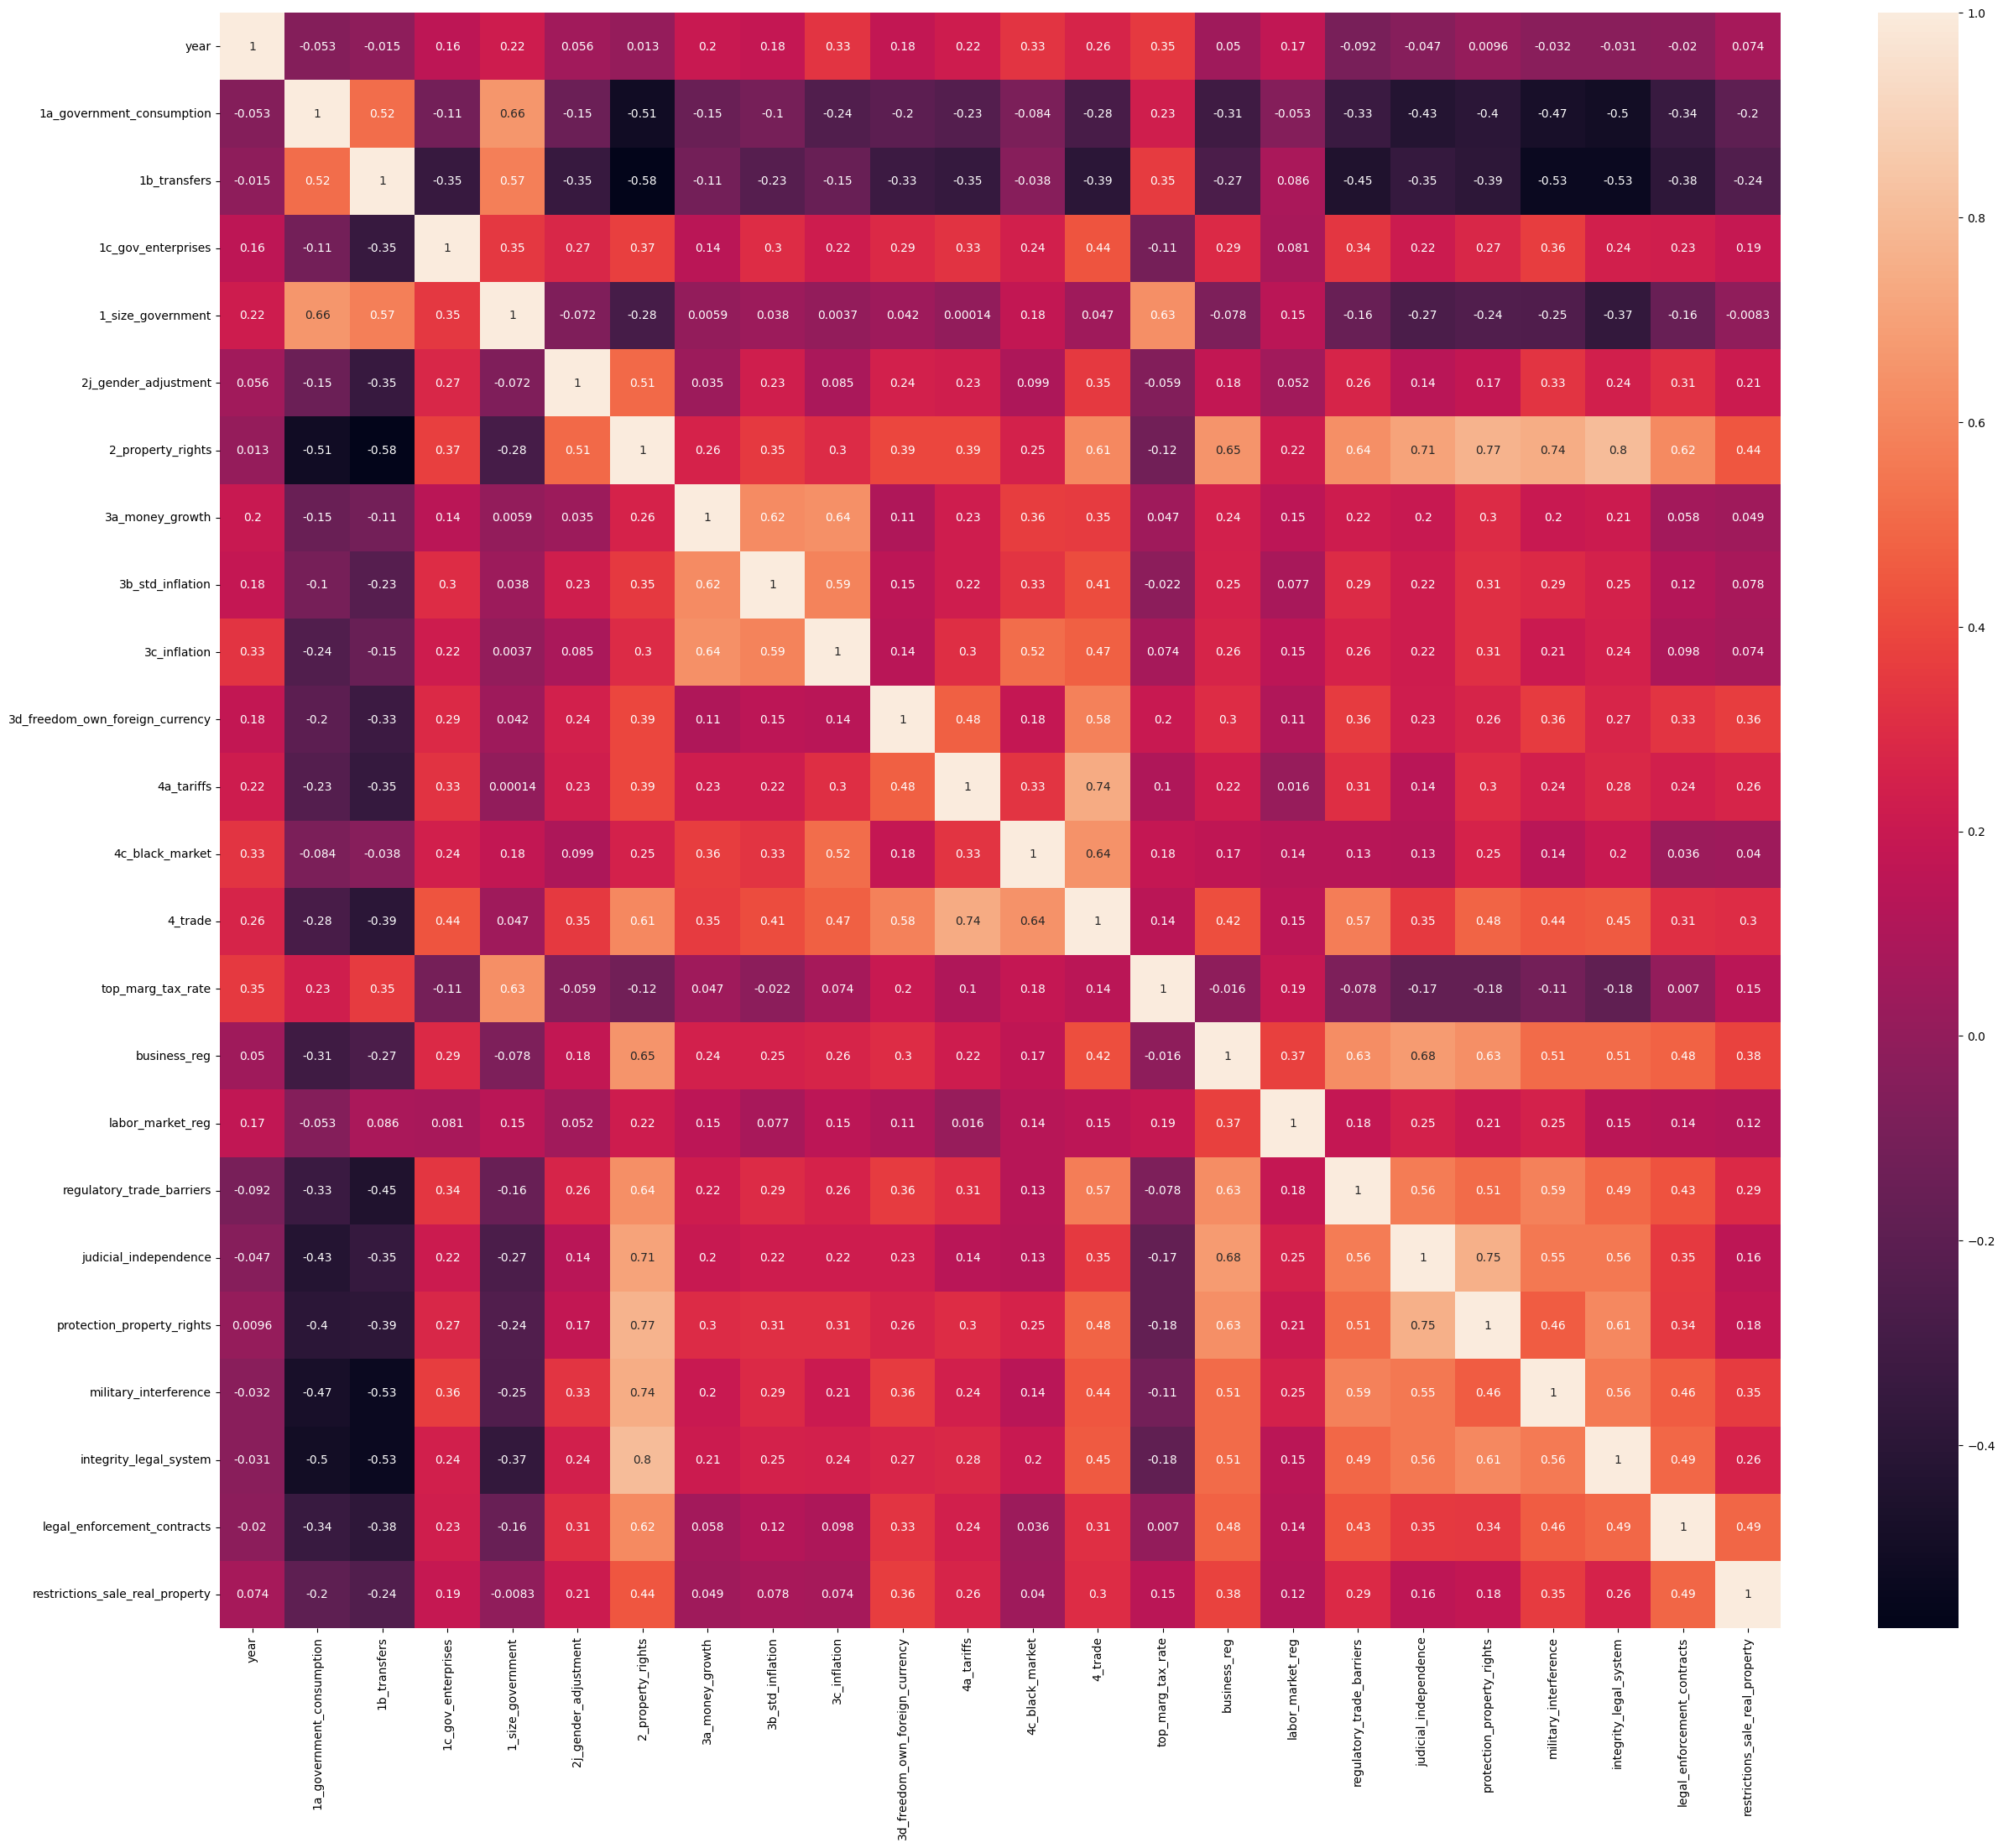

In [ ]:
corr_df = x.corr(method='pearson') #method= standard correlation coefficient, hay otros metodos pero este es el mas popular

plt.figure(figsize=(30, 25))

sns.heatmap(corr_df
            ,annot=True
            )
plt.show()

In [ ]:
# Paso 5: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Veamos el tamaño de los conjuntos de entrenamiento y prueba
print('Tamaño del conjunto de entrenamiento:', len(X_train))
print('Tamaño del conjunto de prueba:', len(X_test))

Tamaño del conjunto de entrenamiento: 2087
Tamaño del conjunto de prueba: 522


In [ ]:
# Paso 6: Entrenar el modelo de regresión lineal
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Paso 7: Hacer predicciones en el conjunto de prueba con el modelo de regresión lineal
y_pred_lin_reg = lin_reg_model.predict(X_test)


In [ ]:
# Paso 8: Evaluar el modelo de regresión lineal
lin_reg_r2_score = r2_score(y_test, y_pred_lin_reg)
print('Coeficiente de determinación del modelo de regresión lineal: ', lin_reg_r2_score)

Coeficiente de determinación del modelo de regresión lineal:  0.9898849912504463


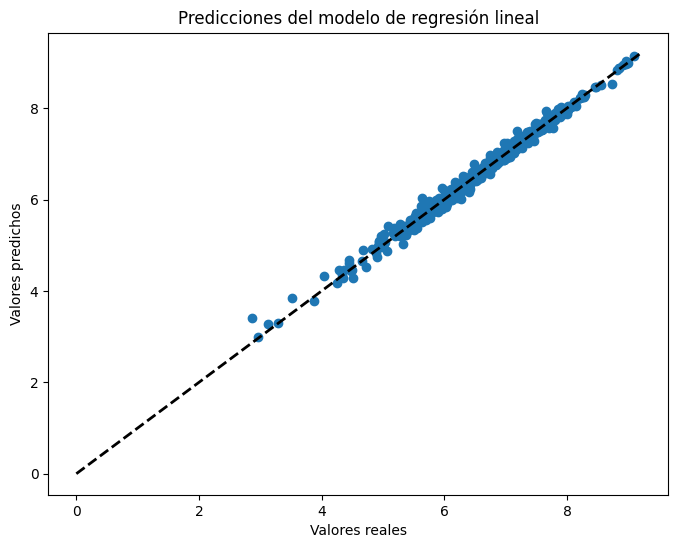

In [ ]:
# Graficar los valores predichos vs. los valores reales del modelo de regresión lineal
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin_reg)
plt.plot([0, max(y)], [0, max(y)], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Predicciones del modelo de regresión lineal')
plt.show()

In [ ]:
# Paso 9: Entrenar el modelo de árbol de decisión
dt_reg_model = DecisionTreeRegressor()
dt_reg_model.fit(X_train, y_train)

# Paso 10: Hacer predicciones en el conjunto de prueba con el modelo de árbol de decisión
y_pred_dt_reg = dt_reg_model.predict(X_test)


In [ ]:
# Paso 11: Evaluar el modelo de árbol de decisión
dt_reg_r2_score = r2_score(y_test, y_pred_dt_reg)
print('Coeficiente de determinación del modelo de árbol de decisión: ', dt_reg_r2_score)

Coeficiente de determinación del modelo de árbol de decisión:  0.9035468128629588


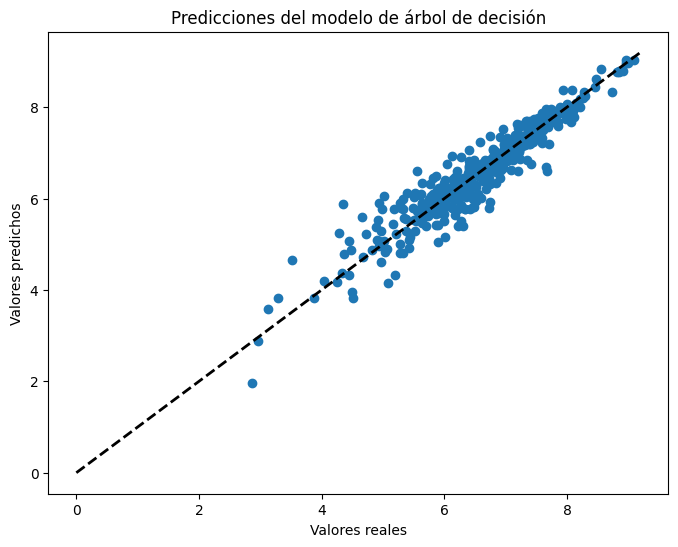

In [ ]:
# Graficar los valores predichos vs. los valores reales del modelo de árbol de decisión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt_reg)
plt.plot([0, max(y)], [0, max(y)], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Predicciones del modelo de árbol de decisión')
plt.show()

In [ ]:
# Imprimir el coeficiente de determinación del modelo de árbol de decisión
print('Coeficiente de determinación del modelo de árbol de decisión: ', dt_reg_r2_score)

Coeficiente de determinación del modelo de árbol de decisión:  0.9035468128629588


Conclusión: El modelo de regresión lineal parece tener un mejor ajuste que el modelo de arbol de desicion, ya que tiene un coeficiente de determinación más alto (0.98 vs. 0.90). Además, la gráfica de valores predichos vs. valores reales del modelo de árbol de decisión muestra una distribución más uniforme de puntos a lo largo de la línea diagonal, lo que indica que las predicciones son más precisas. Sin embargo, todavía hay margen para mejorar el rendimiento del modelo.